In [25]:
import pandas as p
import numpy as np

In [26]:
data=p.read_csv("demand_forecasting.csv")

In [27]:
data

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,NaN,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular
...,...,...,...,...,...,...,...,...,...,...
9995,6545,2024-11-26,54,47,47.12,No,NaN,Competitor Pricing,Decreasing,Budget
9996,4341,2024-04-08,82,59,65.11,No,Festival,NaN,Increasing,Budget
9997,8679,2024-02-16,55,481,59.97,No,Holiday,Economic Indicator,Stable,Premium
9998,6281,2024-02-15,97,142,48.70,No,Festival,NaN,Decreasing,Regular


In [28]:
data.head()

,Product ID,Date,Store ID,Sales Quantity,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments
0,4277,2024-01-03,48,330,24.38,No,Festival,Competitor Pricing,Increasing,Regular
1,5540,2024-04-29,10,334,74.98,Yes,Holiday,Weather,Stable,Premium
2,5406,2024-01-11,67,429,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium
3,5617,2024-04-04,17,298,13.41,No,NaN,Economic Indicator,Stable,Regular
4,3480,2024-12-14,33,344,94.96,Yes,Festival,Weather,Increasing,Regular


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product ID           10000 non-null  int64  
 1   Date                 10000 non-null  object 
 2   Store ID             10000 non-null  int64  
 3   Sales Quantity       10000 non-null  int64  
 4   Price                10000 non-null  float64
 5   Promotions           10000 non-null  object 
 6   Seasonality Factors  6685 non-null   object 
 7   External Factors     7574 non-null   object 
 8   Demand Trend         10000 non-null  object 
 9   Customer Segments    10000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 781.4+ KB


In [30]:
data.describe()

,Product ID,Store ID,Sales Quantity,Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5533.521700,50.264900,248.728900,52.447878
std,2568.312468,28.656333,143.767452,27.459355
min,1000.000000,1.000000,1.000000,5.000000
25%,3319.000000,26.000000,125.000000,28.480000
50%,5579.000000,50.000000,249.000000,52.330000
75%,7696.500000,75.000000,373.000000,76.252500
max,9998.000000,99.000000,499.000000,99.990000


In [31]:
sales = data.pop('Sales Quantity')      # removes and stores the column
data['Sales Quantity'] = sales          

In [32]:
data

,Product ID,Date,Store ID,Price,Promotions,Seasonality Factors,External Factors,Demand Trend,Customer Segments,Sales Quantity
0,4277,2024-01-03,48,24.38,No,Festival,Competitor Pricing,Increasing,Regular,330
1,5540,2024-04-29,10,74.98,Yes,Holiday,Weather,Stable,Premium,334
2,5406,2024-01-11,67,24.83,Yes,Holiday,Economic Indicator,Decreasing,Premium,429
3,5617,2024-04-04,17,13.41,No,NaN,Economic Indicator,Stable,Regular,298
4,3480,2024-12-14,33,94.96,Yes,Festival,Weather,Increasing,Regular,344
...,...,...,...,...,...,...,...,...,...,...
9995,6545,2024-11-26,54,47.12,No,NaN,Competitor Pricing,Decreasing,Budget,47
9996,4341,2024-04-08,82,65.11,No,Festival,NaN,Increasing,Budget,59
9997,8679,2024-02-16,55,59.97,No,Holiday,Economic Indicator,Stable,Premium,481
9998,6281,2024-02-15,97,48.70,No,Festival,NaN,Decreasing,Regular,142


In [33]:
data.isnull().sum()

Product ID                0
Date                      0
Store ID                  0
Price                     0
Promotions                0
Seasonality Factors    3315
External Factors       2426
Demand Trend              0
Customer Segments         0
Sales Quantity            0
dtype: int64

In [34]:
data['Date'] = p.to_datetime(data['Date'])     
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday
data['Is_Weekend'] = data['Weekday'].isin([5, 6]).astype(int)
data['Is_EndOfMonth'] = (data['Date'].dt.day > 25).astype(int)
data.drop('Date', axis=1, inplace=True)
data['Seasonality Factors'].fillna("Missing", inplace=True)
data['External Factors'].fillna("Missing", inplace=True)
data = p.get_dummies(data, drop_first=False, dtype=int)




In [35]:
data.isnull().sum()

Product ID                             0
Store ID                               0
Price                                  0
Sales Quantity                         0
Month                                  0
Weekday                                0
Is_Weekend                             0
Is_EndOfMonth                          0
Promotions_No                          0
Promotions_Yes                         0
Seasonality Factors_Festival           0
Seasonality Factors_Holiday            0
Seasonality Factors_Missing            0
External Factors_Competitor Pricing    0
External Factors_Economic Indicator    0
External Factors_Missing               0
External Factors_Weather               0
Demand Trend_Decreasing                0
Demand Trend_Increasing                0
Demand Trend_Stable                    0
Customer Segments_Budget               0
Customer Segments_Premium              0
Customer Segments_Regular              0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Product ID                           10000 non-null  int64  
 1   Store ID                             10000 non-null  int64  
 2   Price                                10000 non-null  float64
 3   Sales Quantity                       10000 non-null  int64  
 4   Month                                10000 non-null  int32  
 5   Weekday                              10000 non-null  int32  
 6   Is_Weekend                           10000 non-null  int32  
 7   Is_EndOfMonth                        10000 non-null  int32  
 8   Promotions_No                        10000 non-null  int32  
 9   Promotions_Yes                       10000 non-null  int32  
 10  Seasonality Factors_Festival         10000 non-null  int32  
 11  Seasonality Factors_Holiday  

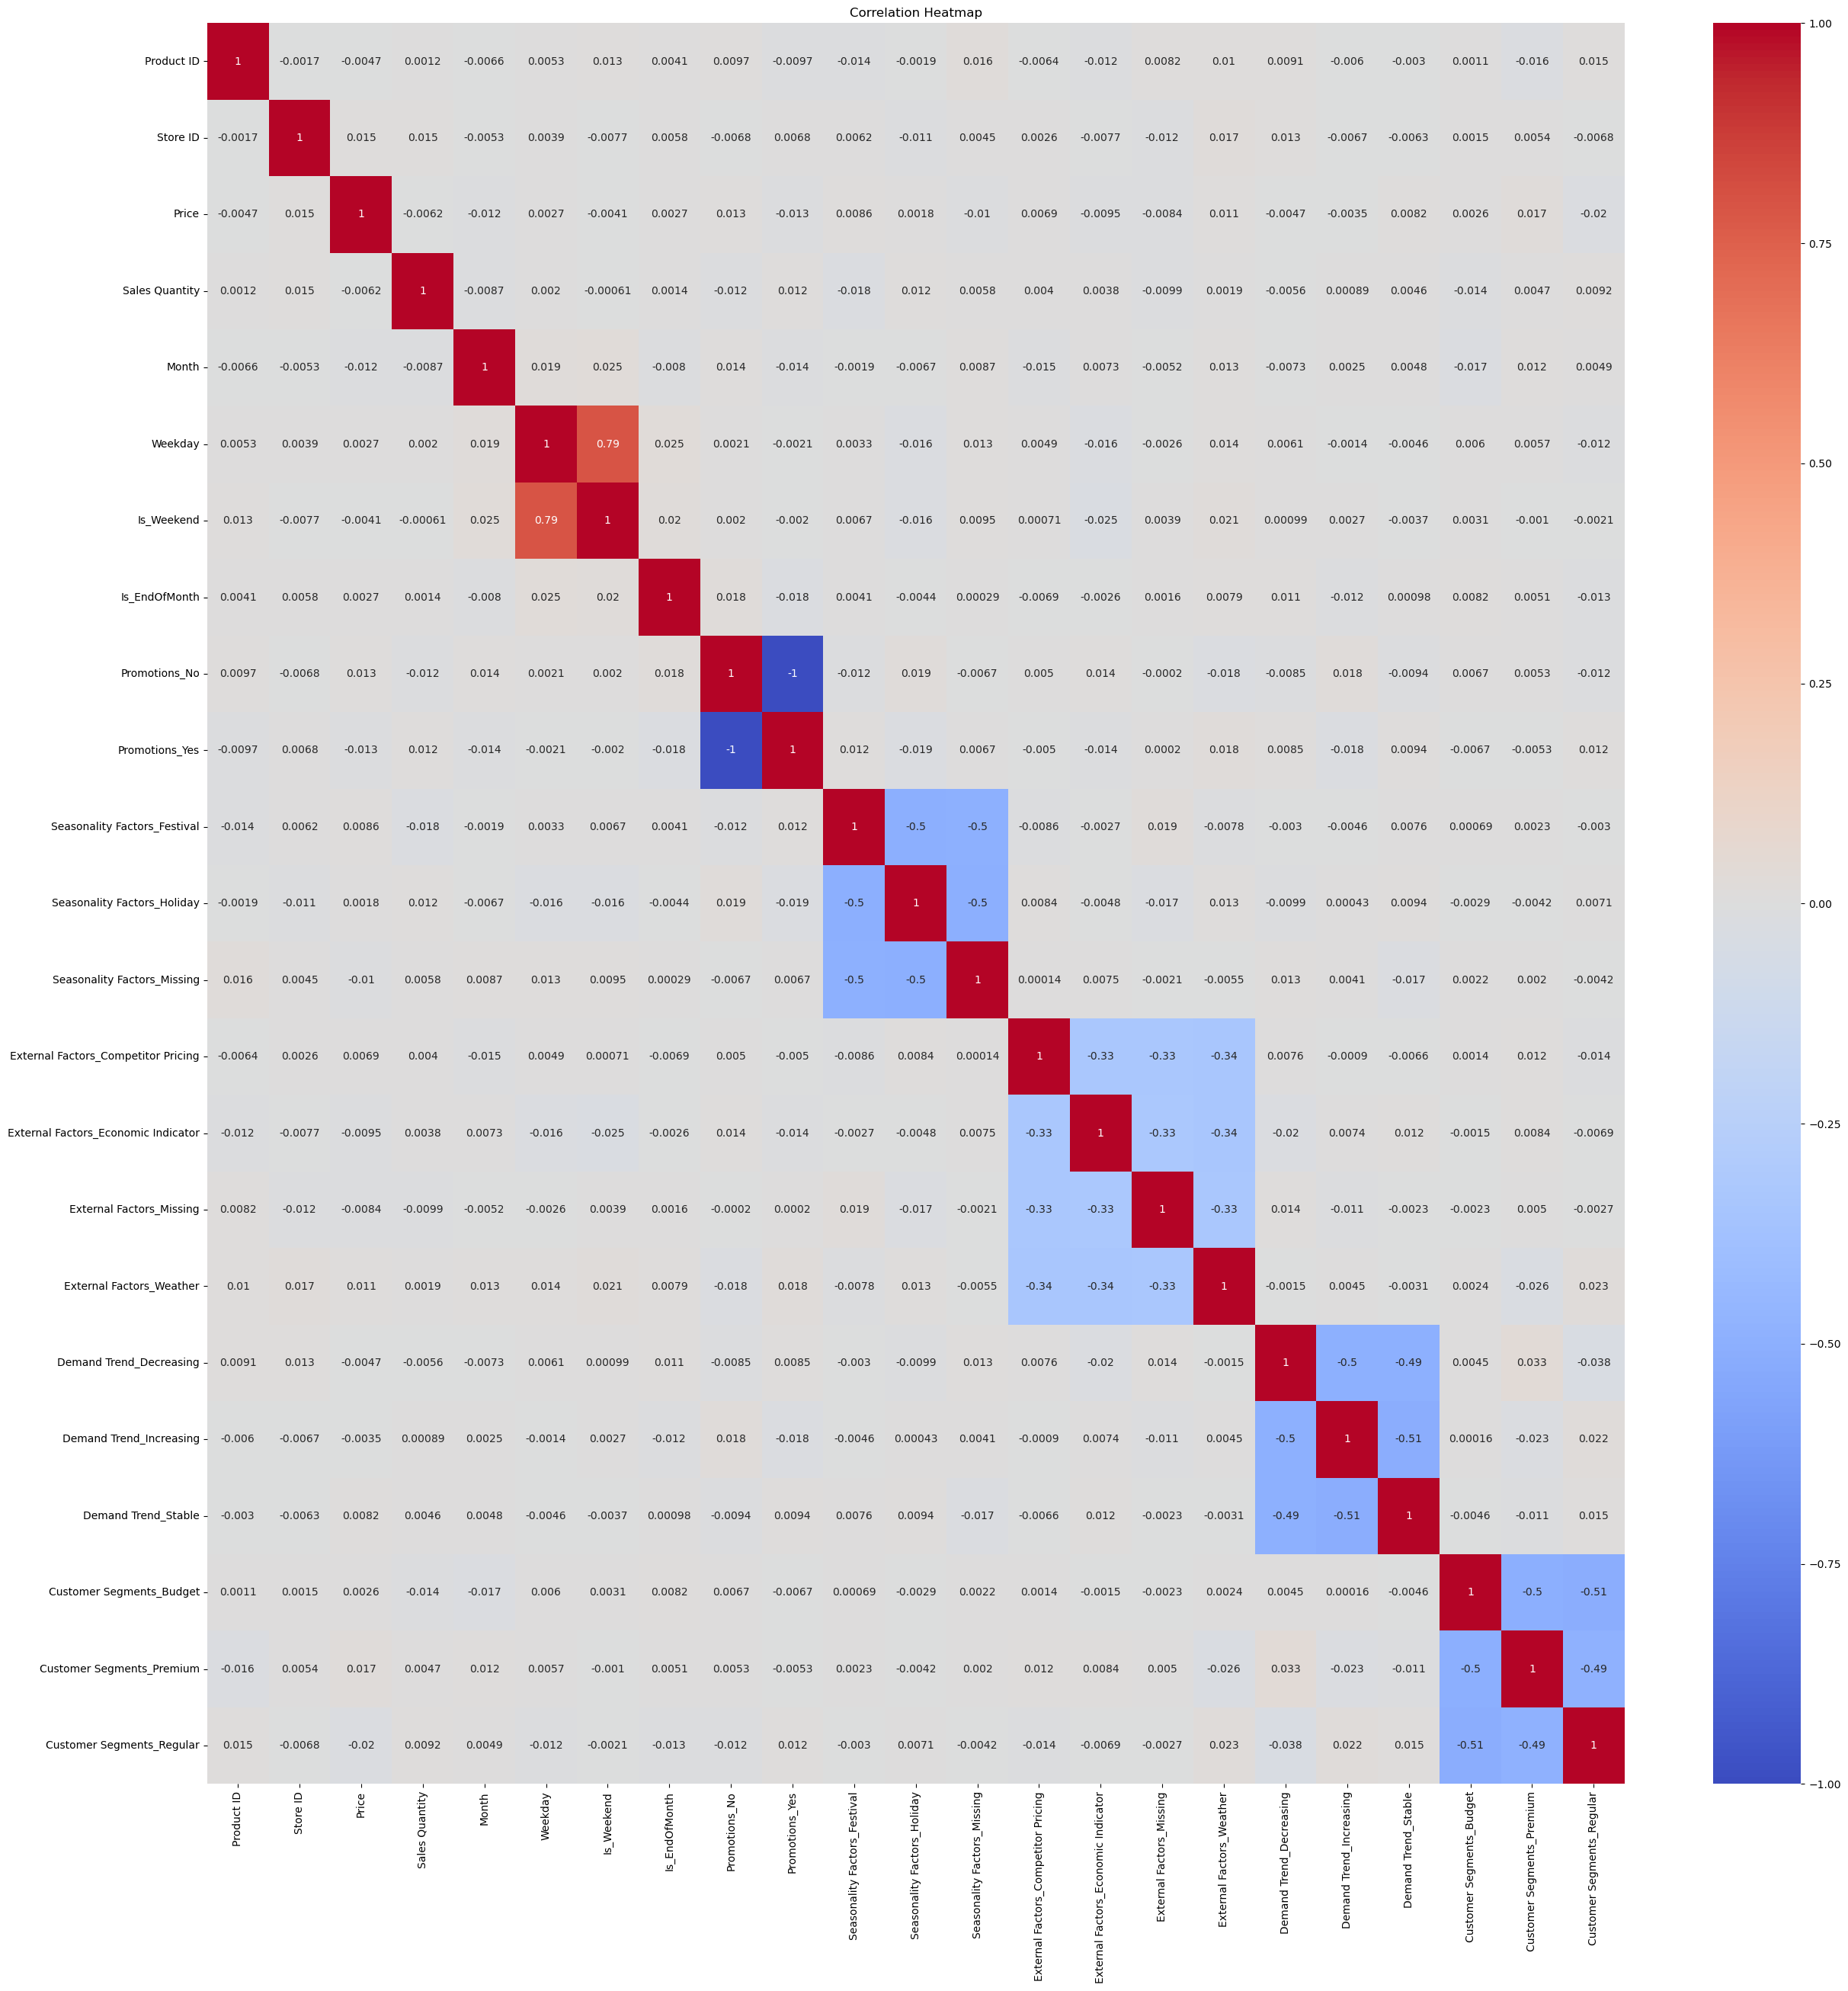

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = data.select_dtypes(include=['number'])
fig = plt.figure(figsize=(30,30))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [38]:
data['Store_Avg_Sales'] = data.groupby('Store ID')['Sales Quantity'].transform('mean')
data['Product_Avg_Sales'] = data.groupby('Product ID')['Sales Quantity'].transform('mean')


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Product ID                           10000 non-null  int64  
 1   Store ID                             10000 non-null  int64  
 2   Price                                10000 non-null  float64
 3   Sales Quantity                       10000 non-null  int64  
 4   Month                                10000 non-null  int32  
 5   Weekday                              10000 non-null  int32  
 6   Is_Weekend                           10000 non-null  int32  
 7   Is_EndOfMonth                        10000 non-null  int32  
 8   Promotions_No                        10000 non-null  int32  
 9   Promotions_Yes                       10000 non-null  int32  
 10  Seasonality Factors_Festival         10000 non-null  int32  
 11  Seasonality Factors_Holiday  

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

x = data.drop('Sales Quantity', axis=1).values
y = data['Sales Quantity'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [41]:
print("R² Score:", round(r2, 4))
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))

R² Score: 0.5864
MAE: 65.49
MSE: 8705.39
RMSE: 93.3


In [42]:
print(len(data))

10000


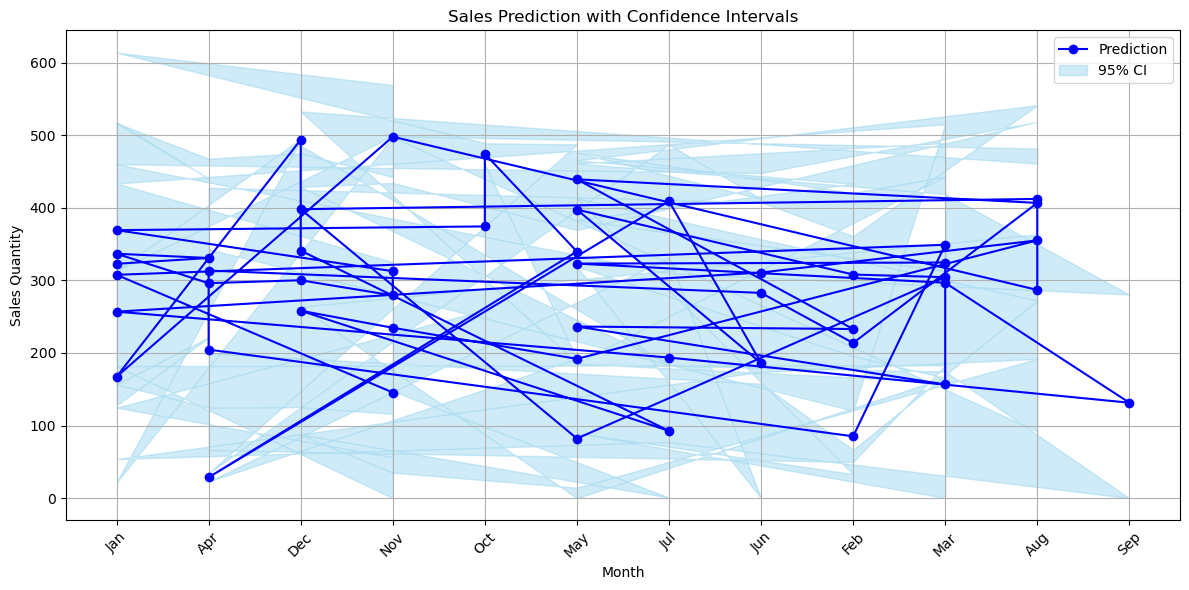

In [44]:
# 1. Scale the entire dataset using the same scaler
x_scaled = scaler.transform(x)

# 2. Get predictions from all trees to estimate prediction variance
all_tree_preds = np.stack([tree.predict(x_scaled) for tree in model.estimators_])  # shape: (n_trees, n_samples)

# 3. Mean and standard deviation across trees
mean_preds = all_tree_preds.mean(axis=0)
std_preds = all_tree_preds.std(axis=0)

# 4. Compute 95% confidence interval
ci = 1.96 * std_preds  # pointwise CI

# 5. Create a new dataframe to hold results
dashboard_df = data.copy()
dashboard_df["Prediction"] = mean_preds
dashboard_df["Lower"] = np.maximum(mean_preds - ci, 0)  # no negative sales
dashboard_df["Upper"] = mean_preds + ci
dashboard_df["Alert"] = dashboard_df["Prediction"].apply(lambda v: "Hot product" if v > 400 else "-")

# (Optional) Add Month Name for better x-axis labels
dashboard_df["Month_Name"] = dashboard_df["Month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",
    5: "May", 6: "Jun", 7: "Jul", 8: "Aug",
    9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# 6. Save to CSV
dashboard_df.to_csv("predicted_sales.csv", index=False)

# 7. Visualize predictions for first 50 samples using Month (or Month_Name)
plt.figure(figsize=(12, 6))
plt.plot(dashboard_df["Month_Name"][:50], dashboard_df["Prediction"][:50], label="Prediction", color="blue", marker='o')
plt.fill_between(dashboard_df["Month_Name"][:50],
                 dashboard_df["Lower"][:50],
                 dashboard_df["Upper"][:50],
                 color="skyblue", alpha=0.4, label="95% CI")
plt.title("Sales Prediction with Confidence Intervals")
plt.xlabel("Month")
plt.ylabel("Sales Quantity")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
